In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/unsupervised')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [15]:
from sklearn.datasets import load_iris
iris_raw_data=load_iris()
X=pd.DataFrame(iris_raw_data.data)
X.columns=iris_raw_data.feature_names

print(" ",type(iris_raw_data)," ==> ", type(X))

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_scaled=std.fit_transform(X)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_scaled_pca=pca.fit_transform(X_scaled)

print(" ", type(X_scaled_pca))

xdf = pd.DataFrame(data=X_scaled_pca)
xdf.head(3)


  <class 'sklearn.utils._bunch.Bunch'>  ==>  <class 'pandas.core.frame.DataFrame'>
  <class 'numpy.ndarray'>


,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908


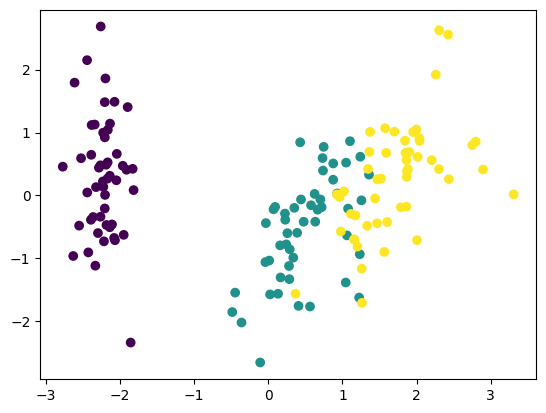

In [17]:
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=iris_raw_data.target)

In [21]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.1)
clf.fit(xdf)
predictions = clf.predict(xdf)

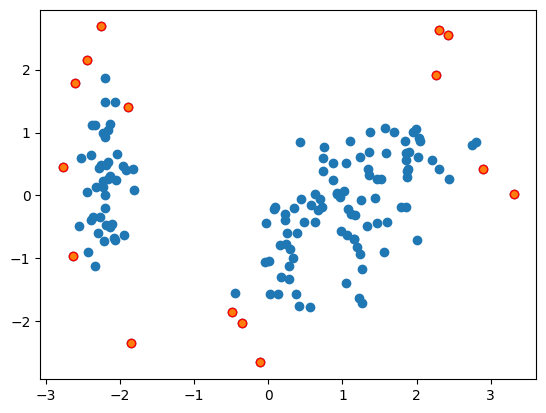

In [22]:
index = np.where(predictions < 0)
plt.scatter(xdf.iloc[:,0], xdf.iloc[:,1])
plt.scatter(X_scaled_pca[index,0], X_scaled_pca[index,1], edgecolors="r")